# Optimalization problem:
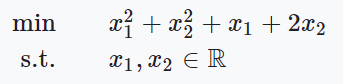

In [ ]:
def function_one(x):
  return x[0]**2 + x[1]**2 + x[0] + 2.0*x[1]

In [ ]:
!pip install autograd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import autograd as ad

# Task 1

Implement the steepest descent algorithm, but do a golden section search to each new search direction. In other words, use line search to determine optimal step length. This means that you need to define a single-variable function to determine the step length. Set the length of the interval for doing line search as a parameter of the method. Solve the above problem using your method.

My golden ration search adapted for this purpose:

In [ ]:
# function for calculate point in the ration of golden section from two points
def golden_ratio(a,b):
  prem = (math.sqrt(5) - 1) / 2
  return a + prem * (b - a)

In [ ]:
# function for calculate norm of vector using dot product
def my_norm_dot(x):
  res = (x.T @ x)**0.5
  return res

# function for calculate distance between two vectors
def my_norm2_dot(x, y):
  u = x - y
  return my_norm_dot(u)

In [ ]:
# as input are:
# starding point: x
# length of interval in which we want to find best value of golden ratio: alpha
# some precision to stop algorithm - in this case i chose distance between two vectors: stop
# function we want to find miniumum: function
# and search direction in which we want to search...that is steepest descent directions: direction

def golden_section_method_dir(x, alpha, stop, function, direction):
  # check input
  if (stop <= 0):
    return -1

  # starting point for search will be x
  # and end point will be starting point + lenght of interval in searching direction
  # there are calulus to obtain direction vector of line, normalization and obtaining final point b
  a = x
  b = direction
  s = b-a # direction vector
  norm = my_norm_dot(s) # normalize direction vector
  unit = s / norm
  new = alpha * unit # new vector in s direction
  b = a + new # final point b

  # stopping criteria is maximal distance between two points
  while(my_norm2_dot(a,b) > stop):
    c = golden_ratio(b,a)
    d = golden_ratio(a,b)
    fc = function(c)
    fd = function(d)
    if (fc < fd):
      b = d
    else:
      a = c
  # return value is distance between starting point a (x) and point with minimal function value using golden ration
  return my_norm2_dot(x,((a + b) / 2))

My implementation of gradient descent method using golden ration search

In [ ]:
# as input comes:
# function which we want to optimize: function
# stariting solution: x_0
# stopping criteria - change in function values is not more that some precision: stop
# interval for searching new step length: alpha

def my_gradient_descent(function, x_0, stop, alpha):
  f_old = float("Inf")
  f_new = function(x_0)
  x = x_0.copy()

  steps_list = [] # for later visualisation

  while f_old-f_new > stop:

    f_old = f_new
    search_dir = -np.array(ad.grad(function)(x))  # antigradinet
    step_length = golden_section_method_dir(x, alpha, stop, function, search_dir) # using golden search
    x = x + search_dir * step_length
    f_new = function(x)
    steps_list.append(list(x))

  return x, f_new, steps_list

result:

In [ ]:
# trying same parameter as on lectures implementaion (below) for comparison
starting_position = np.array([2.0,-10.0])
interval = 0.1
stopping_precision = 0.01
(x_value,f_value,steps_my) = my_gradient_descent(function_one, starting_position, stopping_precision, interval)
print("Optimal solution is ",x_value)
print("Function value :", f_value)
print("Number of steps: " ,len(steps_my))

Optimal solution is  [-0.46393442 -1.12983608]
Function value : -1.231841865900833
Number of steps:  20


# Task 2


Plot the steps of the steepest descent algorithm implemented at the class (with fixed step lengths) against the steps of the steepest descent algorithm that you implemented above. You can choose any starting point you wish, but not the optimum. Compare and analyze the results of both methods.

Implementation of steepest descent from lecture

In [ ]:
import numpy as np
# use a simple stopping rule, where we stop when the change is not bigger than precision and we have a fixed step size.
def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    while abs(f_old-f_new)>precision:
    #while np.linalg.norm(ad.gh(f)[0](x))>precision: # an alternative stopping rule
        f_old = f_new # store value at the current point
        d = -np.array(ad.grad(f)(x)) # search direction ad.grad(f)[0](x)
        x = x+d*step # take a step
        f_new = f(x) # compute function value at the new point
        steps.append(list(x)) # save step
    return x,f_new,steps

results:

In [ ]:
start = [2.0,-10.0]
step_size = 0.1
precision = 0.01
(x_value,f_value,steps_lecutre) = steepest_descent(function_one,start,step_size,precision)
print("Optimal solution is ",x_value)
print("Function value :", f_value)
print("Number of steps: " ,len(steps_lecutre))

Optimal solution is  [-0.47117696 -1.10376294]
Function value : -1.2384024857367766
Number of steps:  20


Visualization function for both - mine and lectures method:

In [ ]:
def plot_steps(steps_one, steps_two, start):
    f, ax = plt.subplots(1, 3, figsize=(12, 5))

    myvec_one = np.array([start] + steps_one).transpose()
    myvec_two = np.array([start] + steps_two).transpose()

    ax[0].plot(myvec_one[0], myvec_one[1], 'ro')
    for label, x, y in zip([str(i) for i in range(len(steps_one) + 1)], myvec_one[0], myvec_one[1]):
        ax[0].annotate(label, xy=(x, y))

    ax[1].plot(myvec_two[0], myvec_two[1], 'bo')
    for label, x, y in zip([str(i) for i in range(len(steps_two) + 1)], myvec_two[0], myvec_two[1]):
        ax[1].annotate(label, xy=(x, y))

    ax[2].plot(myvec_one[0], myvec_one[1], 'ro')
    for label, x, y in zip([str(i) for i in range(len(steps_one) + 1)], myvec_one[0], myvec_one[1]):
        ax[2].annotate(label, xy=(x, y))

    ax[2].plot(myvec_two[0], myvec_two[1], 'bo')
    for label, x, y in zip([str(i) for i in range(len(steps_two) + 1)], myvec_two[0], myvec_two[1]):
        ax[2].annotate(label, xy=(x, y))

    ax[0].grid(False)
    ax[1].grid(False)
    ax[2].grid(False)
    ax[0].set_xlabel('Lectures solution')
    ax[1].set_xlabel('My solution')
    ax[2].set_xlabel('Both; red - lect, blue - my')

    plt.show()

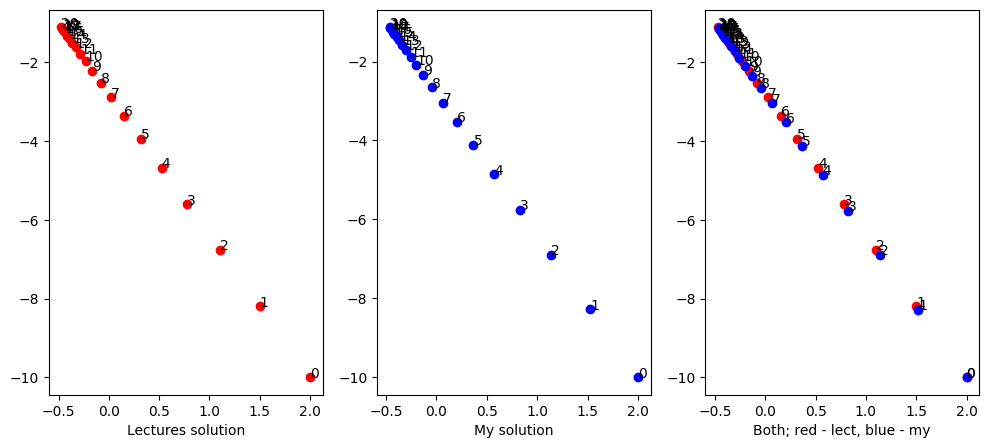

steps lecture:  [[1.5, -8.2], [1.1, -6.76], [0.78, -5.608], [0.524, -4.6864], [0.31920000000000004, -3.9491199999999997], [0.15536000000000003, -3.3592959999999996], [0.024288000000000004, -2.8874367999999997], [-0.08056959999999999, -2.5099494399999998], [-0.16445568, -2.2079595519999997], [-0.23156454399999998, -1.9663676415999998], [-0.28525163519999996, -1.7730941132799998], [-0.32820130816, -1.6184752906239999], [-0.362561046528, -1.4947802324992], [-0.39004883722239997, -1.3958241859993599], [-0.41203906977792, -1.316659348799488], [-0.42963125582233597, -1.2533274790395903], [-0.4437050046578688, -1.2026619832316723], [-0.45496400372629503, -1.1621295865853378], [-0.463971202981036, -1.1297036692682703], [-0.4711769623848288, -1.1037629354146161]]
steps my:  [[1.5225424859373704, -8.281152949374533], [1.1362712429686832, -6.890576474687259], [0.8237712429686801, -5.765576474687247], [0.5709534322265097, -4.855432356015434], [0.36641952685542556, -4.119110296679532], [0.200948121

In [ ]:
plot_steps(steps_lecutre,steps_my,start)
print("steps lecture: " ,steps_lecutre)
print("steps my: ", steps_my)

# Analyze of results:
- I use the same parameters for both methods and here are results:
step_size = 0.1 - in golden search it's interval,
precision = 0.01

Golden search(my):
```
Optimal solution is  [-0.46393442 -1.12983608]
Function value : -1.231841865900833
Number of steps:  20
```
Fixed step(lecture):
```
Optimal solution is  [-0.47117696 -1.10376294]
Function value : -1.2384024857367766
Number of steps:  20
```
Also, below the plot we can see steps which are little different, but there is no big difference. My steps go basically little bit slower form the start as solutin from lecture.

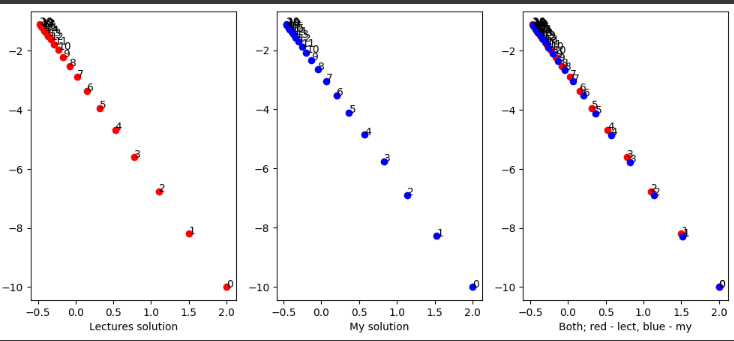

- when i try to change parameter:
step_size/interval = 1
precision = 0.01 (same as above),
here are results:

Golden search(my):
```
Optimal solution is  [-0.47432489 -1.09243041]
Function value : -1.2407974083132483
Number of steps:  276
```
Fixed step(lecture):
```
Optimal solution is  [-3.  8.]
Function value : 86.0
Number of steps:  1
```
Lecture method gives realy bad results, but have only one iteration, obviously. While golden ration method took 276 iterations, but also reach the good soluton. What it intresting to see on plot below(where i plot only last few iterations form golden search) , how golden ratio just jump from basically same result as with fixed step (what is logicall that it was also be there in golden ration method) and then just convergate to optimal solution.

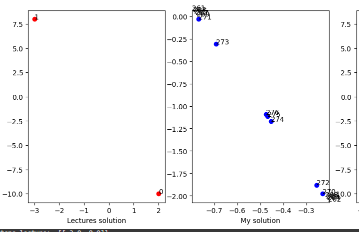
- And finally when i changed also presition fore 0.001, there are results:
step_size/interval = 0.1,
precision = 0.001

Golden search(my):
```
Optimal solution is  [-0.48404268 -1.05744636]
Function value : -1.2464452797062446
Number of steps:  24
```
Fixed step(lecture):
```
Optimal solution is  [-0.49055527 -1.03400104]
Function value : -1.2487547263881142
Number of steps:  25
```
again, results are closely similar, as we can see on plot below, step are basically the same.
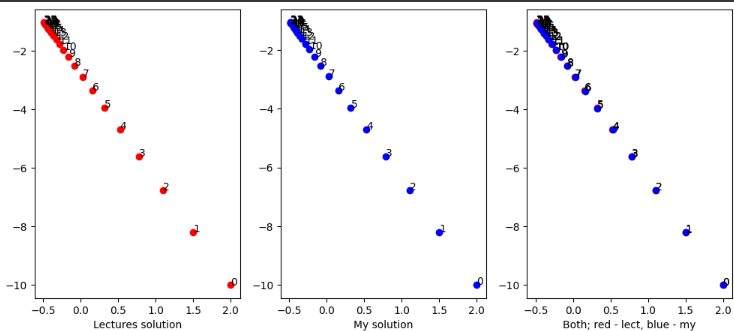








# Task 3

Implement the Quasi-Newton method with DFP update as described e.g., at https://en.wikipedia.org/wiki/Davidon%E2%80%93Fletcher%E2%80%93Powell_formula. In other words, replace the computation of the inverse Hessian in the above problem using this method.

Update of approximation of inverse hessian:
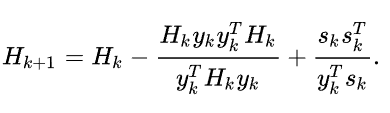

In [ ]:
# as input comes:
# function which we want to optimize: function
# stariting solution: x_0
# stopping criteria - change in function values is not more that some precision: stop
# new step length: step

def quasi_newton_dfp(function, x_0, stop, step):
  f_cur = function(x_0)
  x = x_0.copy()

  # B represents approximation matrix of Hessian inverse matrix, which will be updatetd, at this time it's identity matrix
  B = np.eye(len(x))
  steps_list = [] # for later visualisation
  current_grad = float("Inf") # becasue stopping rule is norm of gradinet, at this time we set it as a big number

  while np.linalg.norm(current_grad) > stop:
    current_grad = np.array(ad.grad(function)(x)) # gradient of current value
    search_dir = - (B@current_grad) # searching directioin
    x_new = x + step * search_dir # create a new step
    new_grad = np.array(ad.grad(function)(x_new)) # gradinet of new value

    delta_x = x_new - x # change of values
    delta_grad = new_grad - current_grad  # change in gradinets
    # needed for updating approximation of hessian inverse matrix

    # first part of equation above (for calculate Hk+1)
    numerator_first = (B @ (np.outer(delta_grad, delta_grad))) @ B # lot of dot products :)
    denominator_first = (delta_grad @ B) @ delta_grad
    # second part of equation above (for calculate Hk+1)
    numerator_second = np.outer(delta_x, delta_x) # outher doc prodatc
    denominator_second = delta_x @ delta_grad # dot prodact

    # updating approximation of hessian inverse matrix
    B = B - numerator_first/denominator_first + numerator_second/denominator_second

    x = x_new # take a new step
    f_cur = function(x) # new value
    steps_list.append(list(x))
  return x, f_cur, steps_list

Results:

In [ ]:
start = np.array([2.0,-10.0])
step_size = 0.1
precision = 0.01
(x_value,f_value,steps) = quasi_newton_dfp(function_one,start,step_size,precision)
print("Optimal solution is ",x_value)
print("Function value :", f_value)
print("Number of steps: " ,len(steps))

Optimal solution is  [-0.48683359 -1.04739907]
Function value : -1.2475799743536249
Number of steps:  521
